# Generali : Claim prediction

## Introduction - Problématique - Contexte de l’étude  
### 1. Description du Data set case 
###  2. Data Exploration/preprocessing 
###  3. Feature Engineering/Sélection et choix faits/Hypothèses choisies 
###   4. Description des méthodes utilisées 
###  5.  Analyse et interpretation des résultats  
###  6.  Conclusions 
###  7. Perspectives 

In [1]:
# coding: utf8

### 1. Description du Data set case 

In [2]:
import pandas as pd
train = pd.read_csv("C:/Users/vince/OneDrive/Bureau/projet/generali claim prediction/X_train.csv", header = 0)
test = pd.read_csv("C:/Users/vince/OneDrive/Bureau/projet/generali claim prediction/X_test.csv", header = 0)
y = pd.read_csv("C:/Users/vince/OneDrive/Bureau/projet/generali claim prediction/y_train_saegPGl.csv", header = 0)

In [3]:
print(train.shape, '\n'"\n", test.shape, '\n'"\n", y.shape)

(10229, 26) 

 (3412, 26) 

 (10229, 3)


###  2. Data Exploration/preprocessing 

In [4]:
y = y.drop(["Unnamed: 0"], axis = 1)
y= y['target']

In [5]:
#nous extrayons les code insee pour obtenir les coordonnées GPS
# https://adresse.data.gouv.fr/
train.Insee.to_csv("C:/Users/vince/OneDrive/Bureau/projet/generali claim prediction/V0/code_insee.csv", header = 0, index= False)

In [6]:
train = train.drop(["Unnamed: 0"], axis = 1)
train

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,18702,2014,1,0,V,N,1,O,1,O,...,IDENTIQUE,V,base,2,1351.0,4,2012.0,0.0,2,65440
1,3877,2014,1,0,V,V,V,V,V,V,...,V,N,base,2,1972.0,2,1980.0,0.0,.,14341
2,4942,2013,1,1,V,V,V,V,V,V,...,V,N,base,2,1630.0,4,NaN,0.0,.,75109
3,13428,2013,"0,246575342",0,N,V,V,V,V,V,...,V,N,base,2,532.0,3,NaN,0.0,.,92004
4,17137,2015,1,0,V,N,2,O,1,O,...,IDENTIQUE,V,base,2,1050.0,2,1972.0,0.0,4,59340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1,0,V,V,V,V,V,V,...,V,N,base,2,550.0,2,1960.0,0.0,.,76217
10225,16868,2014,0,1,V,N,2,O,1,O,...,IDENTIQUE,V,base,2,5580.0,2,2008.0,0.0,4,78073
10226,8499,2015,"0,246575342",0,V,V,V,V,V,V,...,V,N,base,2,750.0,4,NaN,0.0,.,06029
10227,5319,2015,1,0,N,V,V,V,V,V,...,V,N,base,2,1754.0,3,1960.0,0.0,.,64445


was used to prevent change if we dropped columns, but create data leakage
train["target"] = y
train

In [7]:
train.columns

Index(['Identifiant', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ',
       'ft_6_categ', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ', 'ft_10_categ',
       'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ',
       'ft_15_categ', 'ft_16_categ', 'ft_17_categ', 'ft_18_categ',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Insee'],
      dtype='object')

In [8]:
# we can explore our dataset with a usefull library
# https://towardsdatascience.com/10-simple-hacks-to-speed-up-your-data-analysis-in-python-ec18c6396e6b
#library documentation https://pandas-profiling.github.io/pandas-profiling/docs/
import pandas_profiling
profile_generali = train.profile_report()
profile_generali.to_file(output_file="C:/Users/vince/OneDrive/Bureau/projet/generali claim prediction/V0/generali_report.html")

In [9]:
profile_generali.to_widgets()

# Preprocessing

In [10]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html
# values in Expo a miswiritten and we have so convert "," to "." to avoid error
import re
train['EXPO'] = train['EXPO'].str.replace(',', '.', regex = True)
test['EXPO'] = test['EXPO'].str.replace(',', '.', regex = True)

In [11]:
#we set the datype as float32
train['EXPO']  = train['EXPO'].astype('float32')
test['EXPO'] = test['EXPO'].astype('float32')

In [12]:
#this a very unbalanced dataset
counts = y.value_counts()
print("Class distribution:")
counts / counts.sum()

Class distribution:


0    0.772998
1    0.227002
Name: target, dtype: float64

In [13]:
# we set the data types for most of the columns taht are categorical
cat_cols = ['ft_2_categ','ft_4_categ','ft_5_categ', 'ft_6_categ', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ',
       'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ',
       'ft_14_categ', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ', 'ft_19_categ', 'ft_21_categ', 'ft_23_categ', 'ft_24_categ',]

for cat in (cat_cols):
    train[cat] = train[cat].astype("category")
    test[cat] = test[cat].astype("category")

In [14]:
#we check that all of our values are properly determined
train.dtypes

Identifiant       int64
ft_2_categ     category
EXPO            float32
ft_4_categ     category
ft_5_categ     category
ft_6_categ     category
ft_7_categ     category
ft_8_categ     category
ft_9_categ     category
ft_10_categ    category
ft_11_categ    category
ft_12_categ    category
ft_13_categ    category
ft_14_categ    category
ft_15_categ    category
ft_16_categ    category
ft_17_categ    category
ft_18_categ    category
ft_19_categ    category
superficief     float64
ft_21_categ    category
ft_22_categ     float64
ft_23_categ    category
ft_24_categ    category
Insee            object
dtype: object

In [15]:
test.dtypes

Unnamed: 0        int64
Identifiant       int64
ft_2_categ     category
EXPO            float32
ft_4_categ     category
ft_5_categ     category
ft_6_categ     category
ft_7_categ     category
ft_8_categ     category
ft_9_categ     category
ft_10_categ    category
ft_11_categ    category
ft_12_categ    category
ft_13_categ    category
ft_14_categ    category
ft_15_categ    category
ft_16_categ    category
ft_17_categ    category
ft_18_categ    category
ft_19_categ    category
superficief     float64
ft_21_categ    category
ft_22_categ     float64
ft_23_categ    category
ft_24_categ    category
Insee            object
dtype: object

In [16]:
# we check the missing values
train.isna().sum()

Identifiant       0
ft_2_categ        0
EXPO              0
ft_4_categ        0
ft_5_categ        0
ft_6_categ        0
ft_7_categ        0
ft_8_categ        0
ft_9_categ        0
ft_10_categ       0
ft_11_categ       0
ft_12_categ       0
ft_13_categ       0
ft_14_categ       0
ft_15_categ       0
ft_16_categ       0
ft_17_categ       0
ft_18_categ       0
ft_19_categ       0
superficief     119
ft_21_categ       0
ft_22_categ    1236
ft_23_categ       0
ft_24_categ       0
Insee           115
dtype: int64

In [17]:
test.isna().sum()

Unnamed: 0       0
Identifiant      0
ft_2_categ       0
EXPO             0
ft_4_categ       0
ft_5_categ       0
ft_6_categ       0
ft_7_categ       0
ft_8_categ       0
ft_9_categ       0
ft_10_categ      0
ft_11_categ      0
ft_12_categ      0
ft_13_categ      0
ft_14_categ      0
ft_15_categ      0
ft_16_categ      0
ft_17_categ      0
ft_18_categ      0
ft_19_categ      0
superficief     42
ft_21_categ      0
ft_22_categ    402
ft_23_categ      0
ft_24_categ      0
Insee           39
dtype: int64

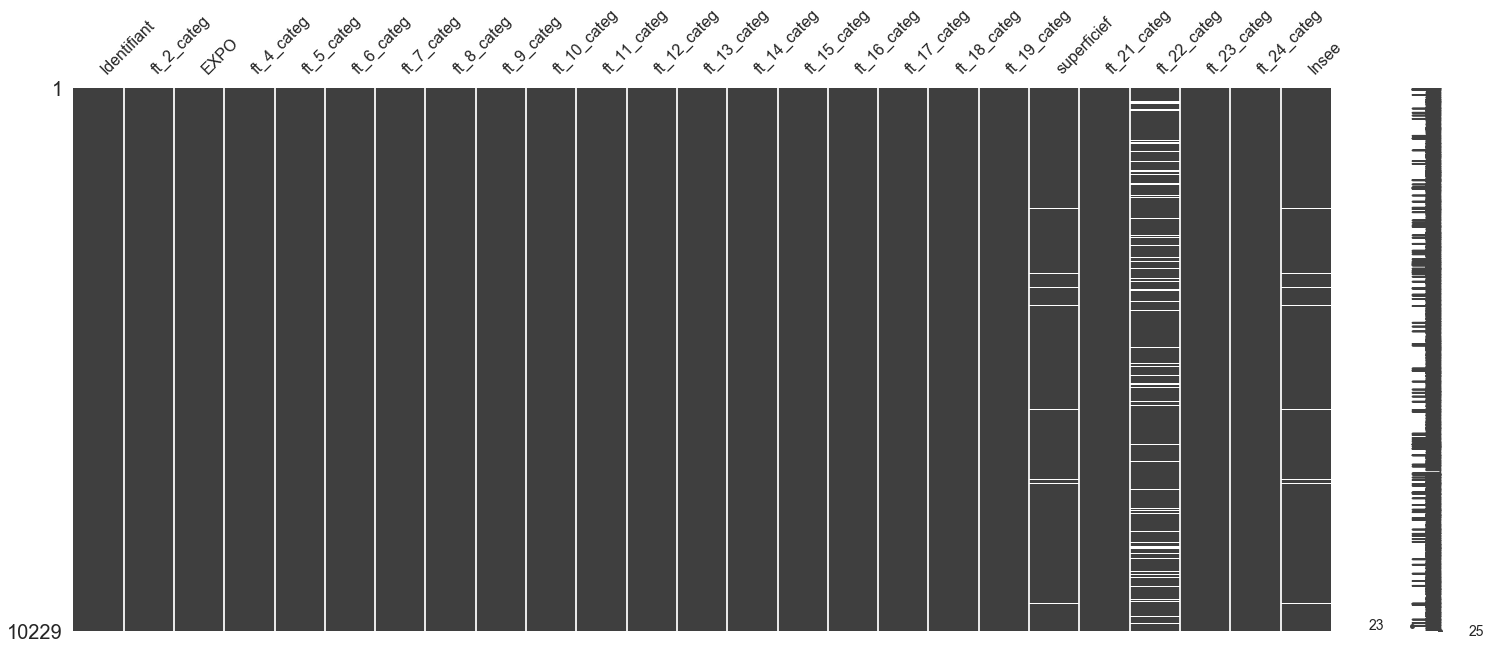

In [18]:
#https://github.com/ResidentMario/missingno
import missingno as msno
%matplotlib inline
msno.matrix(train)

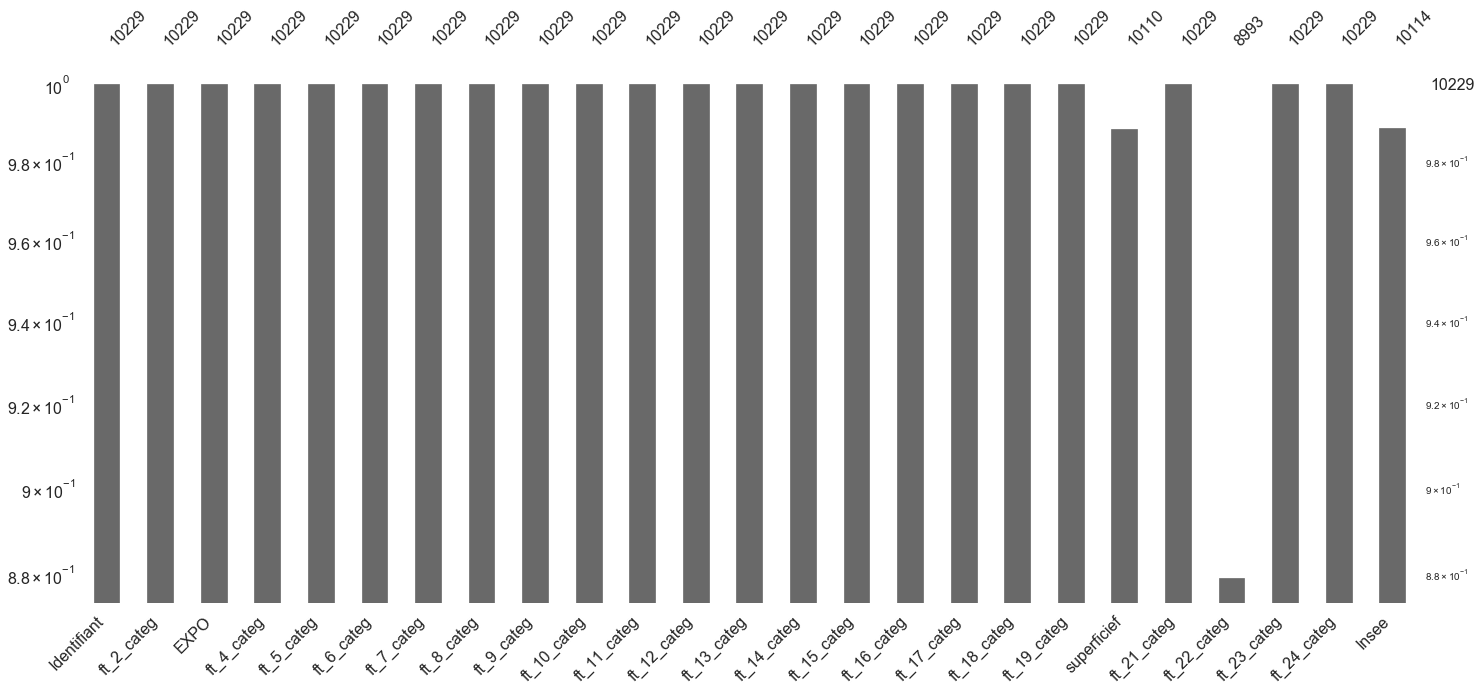

In [19]:
msno.bar(train, log=True)

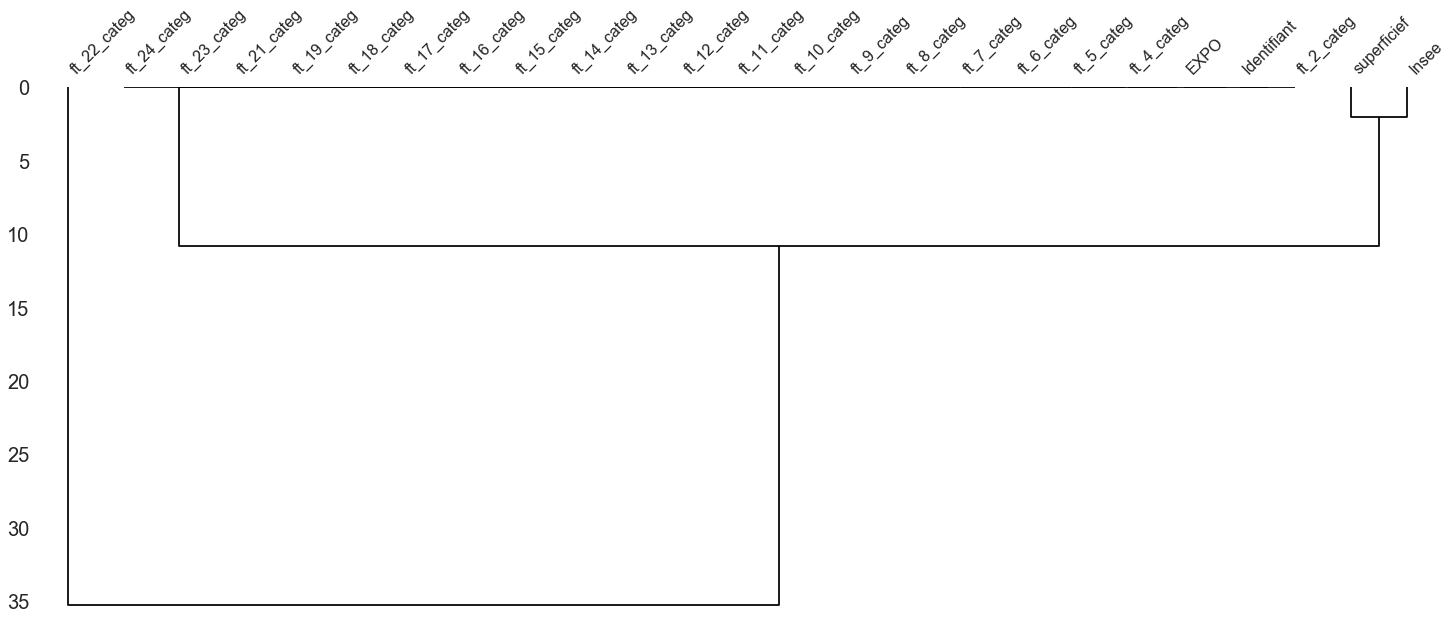

In [20]:
msno.dendrogram(train)

In [21]:
print(train.superficief.describe(), '\n','\n',
      'moyenne:', train.superficief.mean(),'\n','\n',
      'valeurs manquantes:', train.superficief.isna().sum())

count    10110.000000
mean      1818.152918
std       2272.111284
min          1.000000
25%        500.000000
50%       1002.000000
75%       2190.000000
max      30745.000000
Name: superficief, dtype: float64 
 
 moyenne: 1818.1529179030663 
 
 valeurs manquantes: 119


In [22]:
print(train.ft_22_categ .describe(), '\n','\n',
      'moyenne:', train.ft_22_categ .mean(),'\n','\n',
      'valeurs manquantes:', train.ft_22_categ .isna().sum())

count    8993.000000
mean     1965.061715
std        33.548619
min      1545.000000
25%      1960.000000
50%      1970.000000
75%      1980.000000
max      2016.000000
Name: ft_22_categ, dtype: float64 
 
 moyenne: 1965.061714666963 
 
 valeurs manquantes: 1236


In [23]:
# filling missing values with the mean
train.superficief =train.superficief.fillna(train.superficief.mean())

In [24]:
# we simplu fill nul value with the mean value
# we should consider binning technique
train.ft_22_categ = train.ft_22_categ.fillna(train.ft_22_categ.mean())
train.ft_22_categ.astype('int32')

0        2012
1        1980
2        1965
3        1965
4        1972
         ... 
10224    1960
10225    2008
10226    1965
10227    1960
10228    1970
Name: ft_22_categ, Length: 10229, dtype: int32

In [25]:
#we can see that there is actually missing values ".", that was not considered as such by pandas
print(train.ft_24_categ .describe(), '\n','\n',
      'moyenne:', train.ft_22_categ .mean(),'\n','\n',
      'valeurs manquantes:', train.ft_22_categ .isna().sum())

count     10229
unique       11
top           .
freq       5791
Name: ft_24_categ, dtype: object 
 
 moyenne: 1965.0617146670231 
 
 valeurs manquantes: 0


In [26]:
train.isna().sum()

Identifiant      0
ft_2_categ       0
EXPO             0
ft_4_categ       0
ft_5_categ       0
ft_6_categ       0
ft_7_categ       0
ft_8_categ       0
ft_9_categ       0
ft_10_categ      0
ft_11_categ      0
ft_12_categ      0
ft_13_categ      0
ft_14_categ      0
ft_15_categ      0
ft_16_categ      0
ft_17_categ      0
ft_18_categ      0
ft_19_categ      0
superficief      0
ft_21_categ      0
ft_22_categ      0
ft_23_categ      0
ft_24_categ      0
Insee          115
dtype: int64

# data exploration and visualisation

In [27]:
print(train.shape, '\n'"\n", test.shape)

(10229, 25) 

 (3412, 26)


In [28]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

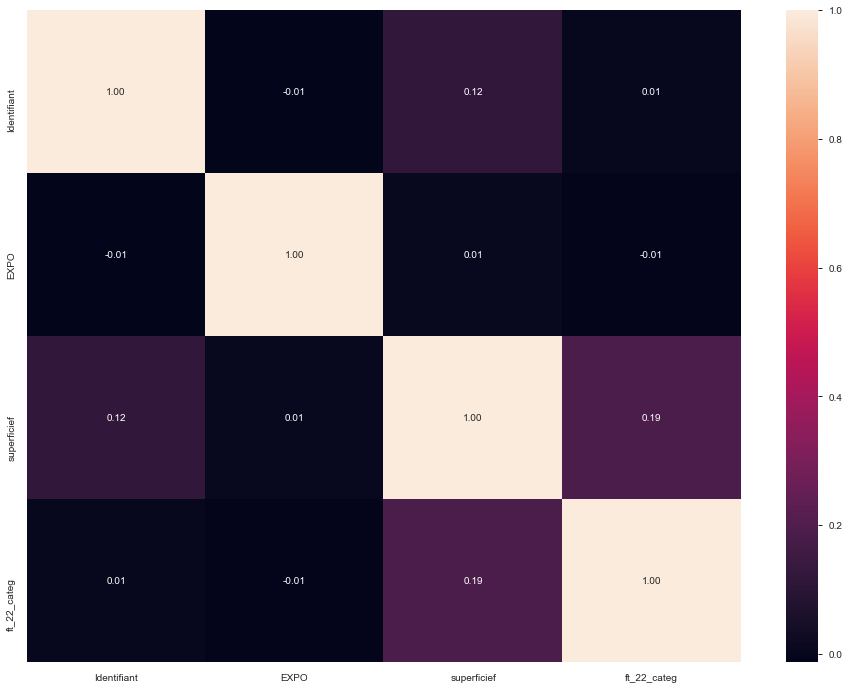

In [29]:
#correlation
plt.figure(figsize=(16,12))
sns.heatmap(train.corr(),annot=True,fmt=".2f")

C:\Users\vince\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\vince\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\vince\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\vince\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\vince\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least

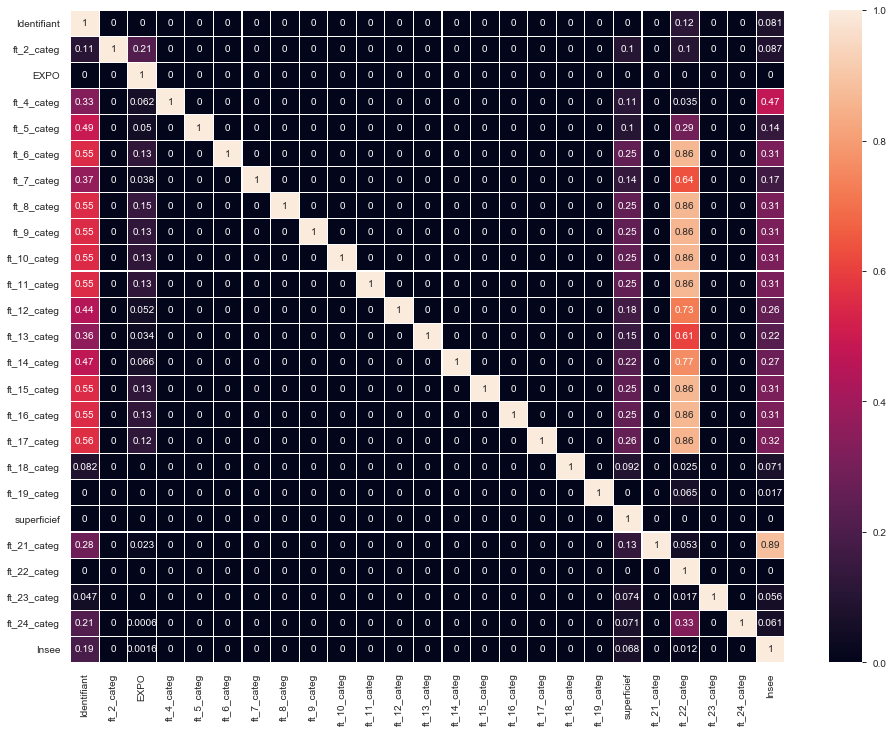

In [30]:
#prédictive power score
import ppscore as pps
import seaborn as sns
train_matrix = pps.matrix(train)
plt.figure(figsize=(16,12))
sns.heatmap(train_matrix, vmin=0, vmax=1, linewidths=0.1, annot=True)

# carte

In [31]:
df = pd.read_csv("C:/Users/vince/OneDrive/Bureau/projet/generali claim prediction/V0/insee_traite.csv", header = 0, sep = ";")
df


,code,latitude,longitude
0,65440,42.902868,0.271084
1,14341,49.137485,-0.351738
2,75109,48.878116,2.342951
3,92004,48.911806,2.299455
4,59340,51.053075,2.446090
...,...,...,...
10224,76217,49.930873,1.084710
10225,78073,NaN,NaN
10226,6029,43.556685,7.010086
10227,64445,43.311690,-0.343816


In [32]:
df["target"] = y
df

,code,latitude,longitude,target
0,65440,42.902868,0.271084,0
1,14341,49.137485,-0.351738,1
2,75109,48.878116,2.342951,0
3,92004,48.911806,2.299455,0
4,59340,51.053075,2.446090,0
...,...,...,...,...
10224,76217,49.930873,1.084710,0
10225,78073,NaN,NaN,0
10226,6029,43.556685,7.010086,0
10227,64445,43.311690,-0.343816,0


In [33]:
has1 = df["target"] ==1
df1 = df[has1]
has0= df["target"] ==0
df0 = df[has0]
df1

,code,latitude,longitude,target
1,14341,49.137485,-0.351738,1
5,13206,43.292825,5.386126,1
18,34032,43.345350,3.221117,1
24,93055,48.889099,2.409362,1
32,83070,NaN,NaN,1
...,...,...,...,...
10196,34324,43.246297,3.290213,1
10211,6083,43.805404,7.476951,1
10212,38185,45.169849,5.738522,1
10220,36044,46.791569,1.693724,1


In [34]:
import geopandas
from matplotlib import pyplot as plt

gdf0 = geopandas.GeoDataFrame(
    df0, geometry=geopandas.points_from_xy(df0.longitude, df0.latitude))
gdf1 = geopandas.GeoDataFrame(
    df1, geometry=geopandas.points_from_xy(df1.longitude, df1.latitude))


C:\Users\vince\Anaconda3\lib\site-packages\geopandas\plotting.py:471: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
C:\Users\vince\Anaconda3\lib\site-packages\geopandas\plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


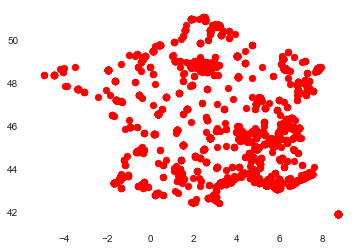

In [36]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to France.
ax = world[world.continent == 'France'].plot(gdf0.target,
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf0.plot(ax=ax, color='red', column=df0.target)

plt.show()

C:\Users\vince\Anaconda3\lib\site-packages\geopandas\plotting.py:471: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
C:\Users\vince\Anaconda3\lib\site-packages\geopandas\plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


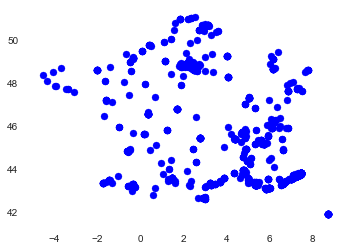

In [37]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to France.
ax = world[world.continent == 'France'].plot(gdf1.target,
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf1.plot(ax=ax, color='blue', column=df1.target)

plt.show()

In [ ]:
print(train.columns)
print(train.shape)

# deleting unnecessary column
train = train.drop(['Unnamed: 0'], axis= 1)
y=
train = train.drop("target", axis = 1)

In [ ]:
train

In [ ]:
#as the target value ar eunbalaned 
# put a weight on target data 
#subsamplig or oversampling

# Encoding methods

In [38]:
#ther column 7 and 22 that should be considered with care

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from dirty_cat import SimilarityEncoder

cat1_encoder =  OneHotEncoder(handle_unknown='ignore')

cat_cols = ['ft_2_categ','ft_4_categ','ft_5_categ', 'ft_6_categ','ft_7_categ',
            'ft_8_categ', 'ft_9_categ',
       'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ',
       'ft_14_categ', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ', 'ft_19_categ', 'ft_21_categ',
       'ft_23_categ', 'ft_24_categ',]

#we treat this columns separately as it has letter and number#
#dirty_cats = SimilarityEncoder()
# dirty_cols =['ft_7_categ']
#raise an error

#wondering if we should inclue
numerical_scaler = StandardScaler()
numerical_cols = ["superficief", 'ft_22_categ', 'EXPO']

preprocessor = make_column_transformer(
    (cat1_encoder , cat_cols),
    (numerical_scaler, numerical_cols), 
    )


In [39]:
#including ft_24 as numerical

cat_cols_2 = ['ft_2_categ','ft_4_categ','ft_5_categ', 'ft_6_categ','ft_7_categ',
            'ft_8_categ', 'ft_9_categ',
       'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ',
       'ft_14_categ', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ', 'ft_19_categ', 'ft_21_categ',
       'ft_23_categ', ]
#wondering if we should inclue
numerical_scaler = StandardScaler()
numerical_cols_2 = ["superficief", 'ft_22_categ', 'EXPO', 'ft_24_categ']

preprocessor2=make_column_transformer(
    (cat1_encoder , cat_cols_2),
    (numerical_scaler, numerical_cols_2), 
    )

In [40]:
ordi_encoder = OrdinalEncoder()
#handle unknown to avoid eror when tranforming model (https://github.com/scikit-learn/scikit-learn94
categorical_encoder = make_pipeline(SimpleImputer(strategy = "constant", fill_value = "missing"), OrdinalEncoder())

cat_cols = ['ft_2_categ','ft_4_categ','ft_5_categ', 'ft_6_categ','ft_7_categ',
            'ft_8_categ', 'ft_9_categ',
       'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ',
       'ft_14_categ', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ', 'ft_19_categ', 'ft_21_categ',
       'ft_23_categ', 'ft_24_categ',]

preprocessor3=make_column_transformer(
    (categorical_encoder, cat_cols_2),
    (numerical_scaler, numerical_cols_2), 
    )

#ther column 7 and 22 that should be considered with care

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from dirty_cat import SimilarityEncoder

ordi_encoder = OrdinalEncoder()

label_encoder = LabelEncoder()

cat1_encoder =  OneHotEncoder(handle_unknown='ignore')
#handle unknown to avoid eror when tranforming model (https://github.com/scikit-learn/scikit-learn94
categorical_encoder = make_pipeline(SimpleImputer(strategy = "constant", fill_value = "missing"), OrdinalEncoder())

cat_cols = ['ft_2_categ','ft_4_categ','ft_5_categ', 'ft_6_categ','ft_7_categ',
            'ft_8_categ', 'ft_9_categ',
       'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ',
       'ft_14_categ', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ', 'ft_19_categ', 'ft_21_categ',
       'ft_23_categ', 'ft_24_categ',]

#we treat this columns separately as it has letter and number#
#dirty_cats = SimilarityEncoder()
dirty_cols =['ft_7_categ']
#raise an error

#wondering if we should inclue
numerical_scaler = StandardScaler()
numerical_cols = ["superficief", 'ft_22_categ', 'EXPO']

preprocessor = make_column_transformer(
    (cat1_encoder , cat_cols),
    (numerical_scaler, numerical_cols), 
    )

preprocessor2=

# MODELS

In [41]:
#Metrique foruni par Generali
import numpy as np

def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

# now you can import normally from ensemble

clf_RF = RandomForestClassifier(n_estimators=200, n_jobs=6, min_samples_split=2, max_features= 0.1, max_depth=10, random_state=0)
#using best estimatr parameter

clf_RF2 = RandomForestClassifier(n_estimators = 600,min_samples_split= 2,
 min_samples_leaf= 4,
 max_features= 'auto',
 max_depth= 40,
 bootstrap= True)

#using best estimatr parameter using grid search cv
clf_RF3 = RandomForestClassifier(n_estimators = 200,min_samples_split= 10,
 min_samples_leaf= 3,
 max_features= 3,
 max_depth= 100,
 bootstrap= True)

clf_SVC = SVC(gamma='auto')

clf_ETC = ExtraTreesClassifier(n_estimators=100, random_state=0)

clf_LR = LogisticRegression()


clf_GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)

#parameter from gridsearch
clf_XGB = XGBClassifier(subsample= 1.0, min_child_weight= 5, max_depth= 3, gamma= 5, colsample_bytree= 1.0)

clf_HGBC = HistGradientBoostingClassifier(learning_rate= 0.5, random_state = 42, verbose =1)

pipeline_RF = make_pipeline(preprocessor, clf_RF)
pipeline_RF3 = make_pipeline(preprocessor, clf_RF3)
pipeline_RF2 = make_pipeline(preprocessor, clf_RF2)
pipeline_GBC = make_pipeline(preprocessor, clf_GBC)
pipeline_XGB = make_pipeline(preprocessor, clf_XGB)
pipeline_HGBC = make_pipeline(preprocessor, clf_HGBC)
pipeline_ETC = make_pipeline(preprocessor, clf_ETC)
pipeline_LR = make_pipeline(preprocessor, clf_LR)
pipeline_SVC = make_pipeline(preprocessor, clf_SVC)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train,
    y, test_size=0.3)

Accuracy Score : 0.776474421635712
Precision Score : 0.6833333333333333
Recall Score : 0.05790960451977401
F1 Score : 0.10677083333333334
average_precision_score :0.2569061997779876
area under the curve :0.5249310834966511 

classification_report 
               precision    recall  f1-score   support

           0       0.78      0.99      0.87      2361
           1       0.68      0.06      0.11       708

    accuracy                           0.78      3069
   macro avg       0.73      0.52      0.49      3069
weighted avg       0.76      0.78      0.70      3069

Confusion Matrix : 
[[2342   19]
 [ 667   41]] 



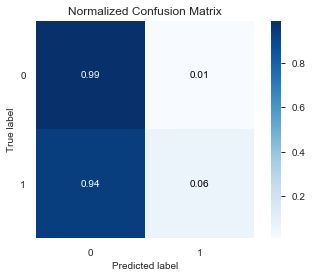

gini: 0.01816460578078948
gini_normalized: 0.047223358865940625


In [44]:
pipeline_RF.fit(X_train, y_train)
y_pred = pipeline_RF.predict(X_test)

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import average_precision_score, auc, roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('average_precision_score :' + str(average_precision_score(y_test,y_pred)))
print('area under the curve :' + str(roc_auc_score(y_test,y_pred)),'\n')

#we change from initi al metric AUC to ROC_auc-score
#print('area under the curve :' + str(auc(y_test,y_pred)))

#Dummy Classifier Confusion matrix

from sklearn.metrics import classification_report
print("classification_report",'\n',classification_report(y_test, y_pred))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)), '\n')

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

print("gini:",gini(y_test, y_pred))
print("gini_normalized:",gini_normalized(y_test, y_pred))

# ExtraTreesClassifier

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

clf_ETC = ExtraTreesClassifier(n_estimators=100, random_state=0)

pipeline_ETC = make_pipeline(preprocessor, clf_ETC)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train,
    y, test_size=0.3)

pipeline_ETC.fit(X_train, y_train)
y_pred = pipeline_ETC.predict(X_test)



Accuracy Score : 0.7302052785923754
Precision Score : 0.37181996086105673
Recall Score : 0.27259684361549497
F1 Score : 0.314569536423841
average_precision_score :0.26655733873080356
area under the curve :0.5686340035952685 

classification_report 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      2372
           1       0.37      0.27      0.31       697

    accuracy                           0.73      3069
   macro avg       0.59      0.57      0.57      3069
weighted avg       0.70      0.73      0.71      3069

Confusion Matrix : 
[[2051  321]
 [ 507  190]] 



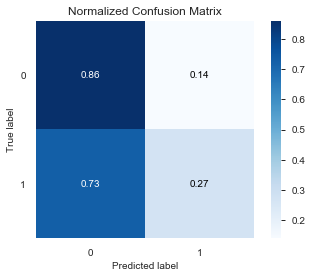

gini: 0.04053026212511568
gini_normalized: 0.1048797423794098


In [46]:

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('average_precision_score :' + str(average_precision_score(y_test,y_pred)))
print('area under the curve :' + str(roc_auc_score(y_test,y_pred)),'\n')

#we change from initi al metric AUC to ROC_auc-score
#print('area under the curve :' + str(auc(y_test,y_pred)))

#Dummy Classifier Confusion matrix

from sklearn.metrics import classification_report
print("classification_report",'\n',classification_report(y_test, y_pred))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)), '\n')

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

print("gini:",gini(y_test, y_pred))
print("gini_normalized:",gini_normalized(y_test, y_pred))

#  Gradient boosting

Accuracy Score : 0.782991202346041
Precision Score : 0.5758928571428571
Recall Score : 0.18428571428571427
F1 Score : 0.2792207792207792
average_precision_score :0.292182915810508
area under the curve :0.5720922028583488 

classification_report 
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      2369
           1       0.58      0.18      0.28       700

    accuracy                           0.78      3069
   macro avg       0.69      0.57      0.58      3069
weighted avg       0.75      0.78      0.74      3069

Confusion Matrix : 
[[2274   95]
 [ 571  129]] 



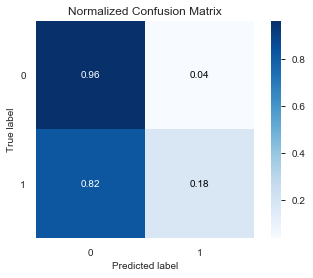

gini: 0.03156635479216125
gini_normalized: 0.08178737261050475


In [47]:
pipeline_GBC = make_pipeline(preprocessor, clf_GBC)

X_train, X_test, y_train, y_test = train_test_split(
    train,
    y, test_size=0.3)

pipeline_GBC.fit(X_train, y_train)
y_pred = pipeline_GBC.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('average_precision_score :' + str(average_precision_score(y_test,y_pred)))
print('area under the curve :' + str(roc_auc_score(y_test,y_pred)),'\n')

#we change from initi al metric AUC to ROC_auc-score
#print('area under the curve :' + str(auc(y_test,y_pred)))

#Dummy Classifier Confusion matrix

from sklearn.metrics import classification_report
print("classification_report",'\n',classification_report(y_test, y_pred))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)), '\n')

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

print("gini:",gini(y_test, y_pred))
print("gini_normalized:",gini_normalized(y_test, y_pred))

# Random Forest 2

Accuracy Score : 0.7781036168132942
Precision Score : 0.625
Recall Score : 0.09193776520509193
F1 Score : 0.16029593094944514
average_precision_score :0.2666497640547465
area under the curve :0.5377131671072031 

classification_report 
               precision    recall  f1-score   support

           0       0.78      0.98      0.87      2362
           1       0.62      0.09      0.16       707

    accuracy                           0.78      3069
   macro avg       0.70      0.54      0.52      3069
weighted avg       0.75      0.78      0.71      3069

Confusion Matrix : 
[[2323   39]
 [ 642   65]] 



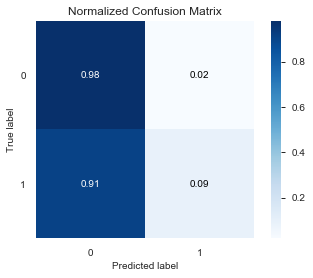

gini: 0.038265577709844734
gini_normalized: 0.09943866045005377


In [48]:
pipeline_RF2 = make_pipeline(preprocessor, clf_RF2)

X_train, X_test, y_train, y_test = train_test_split(
    train,
    y, test_size=0.3)

pipeline_RF2.fit(X_train, y_train)
y_pred = pipeline_RF2.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('average_precision_score :' + str(average_precision_score(y_test,y_pred)))
print('area under the curve :' + str(roc_auc_score(y_test,y_pred)),'\n')

#we change from initi al metric AUC to ROC_auc-score
#print('area under the curve :' + str(auc(y_test,y_pred)))

#Dummy Classifier Confusion matrix

from sklearn.metrics import classification_report
print("classification_report",'\n',classification_report(y_test, y_pred))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)), '\n')

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

print("gini:",gini(y_test, y_pred))
print("gini_normalized:",gini_normalized(y_test, y_pred))

# Random Forest 3

Accuracy Score : 0.7813620071684588
Precision Score : 0.5806451612903226
Recall Score : 0.026627218934911243
F1 Score : 0.050919377652050915
average_precision_score :0.22986305120300157
area under the curve :0.51059735372153 

classification_report 
               precision    recall  f1-score   support

           0       0.78      0.99      0.88      2393
           1       0.58      0.03      0.05       676

    accuracy                           0.78      3069
   macro avg       0.68      0.51      0.46      3069
weighted avg       0.74      0.78      0.69      3069

Confusion Matrix : 
[[2380   13]
 [ 658   18]] 



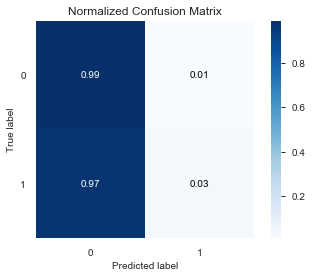

gini: 0.015313470648458267
gini_normalized: 0.039278764245815646


In [50]:
pipeline_RF3 = make_pipeline(preprocessor, clf_RF3)

X_train, X_test, y_train, y_test = train_test_split(
    train,
    y, test_size=0.3)

pipeline_RF3.fit(X_train, y_train)
y_pred = pipeline_RF3.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('average_precision_score :' + str(average_precision_score(y_test,y_pred)))
print('area under the curve :' + str(roc_auc_score(y_test,y_pred)),'\n')

#we change from initi al metric AUC to ROC_auc-score
#print('area under the curve :' + str(auc(y_test,y_pred)))

#Dummy Classifier Confusion matrix

from sklearn.metrics import classification_report
print("classification_report",'\n',classification_report(y_test, y_pred))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)), '\n')

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

print("gini:",gini(y_test, y_pred))
print("gini_normalized:",gini_normalized(y_test, y_pred))

# Logistic Regression

C:\Users\vince\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy Score : 0.7816878462039752
Precision Score : 0.5818181818181818
Recall Score : 0.13773314203730272
F1 Score : 0.22273781902552203
average_precision_score :0.27596490662163825
area under the curve :0.55432188299167 

classification_report 
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      2372
           1       0.58      0.14      0.22       697

    accuracy                           0.78      3069
   macro avg       0.69      0.55      0.55      3069
weighted avg       0.75      0.78      0.73      3069

Confusion Matrix : 
[[2303   69]
 [ 601   96]] 



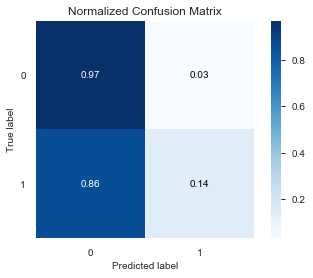

gini: 0.035413607543010074
gini_normalized: 0.09163942795067277


In [51]:
pipeline_LR = make_pipeline(preprocessor, clf_LR)

X_train, X_test, y_train, y_test = train_test_split(
    train,
    y, test_size=0.3)

pipeline_LR.fit(X_train, y_train)
y_pred = pipeline_LR.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('average_precision_score :' + str(average_precision_score(y_test,y_pred)))
print('area under the curve :' + str(roc_auc_score(y_test,y_pred)),'\n')

#we change from initi al metric AUC to ROC_auc-score
#print('area under the curve :' + str(auc(y_test,y_pred)))

#Dummy Classifier Confusion matrix

from sklearn.metrics import classification_report
print("classification_report",'\n',classification_report(y_test, y_pred))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)), '\n')

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

print("gini:",gini(y_test, y_pred))
print("gini_normalized:",gini_normalized(y_test, y_pred))

Accuracy Score : 0.7898338220918866
Precision Score : 0.6272189349112426
Recall Score : 0.15406976744186046
F1 Score : 0.2473745624270712
average_precision_score :0.2862737941074833
area under the curve :0.5638051483156384 

classification_report 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      2381
           1       0.63      0.15      0.25       688

    accuracy                           0.79      3069
   macro avg       0.71      0.56      0.56      3069
weighted avg       0.76      0.79      0.74      3069

Confusion Matrix : 
[[2318   63]
 [ 582  106]] 



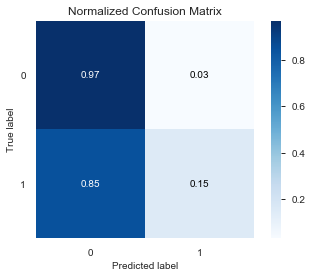

gini: 0.03943646896572627
gini_normalized: 0.10166360626275844


In [53]:
pipeline_XGB = make_pipeline(preprocessor, clf_XGB)

X_train, X_test, y_train, y_test = train_test_split(
    train,
    y, test_size=0.3)

pipeline_XGB.fit(X_train, y_train)
y_pred = pipeline_XGB.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('average_precision_score :' + str(average_precision_score(y_test,y_pred)))
print('area under the curve :' + str(roc_auc_score(y_test,y_pred)),'\n')

#we change from initi al metric AUC to ROC_auc-score
#print('area under the curve :' + str(auc(y_test,y_pred)))

#Dummy Classifier Confusion matrix

from sklearn.metrics import classification_report
print("classification_report",'\n',classification_report(y_test, y_pred))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)), '\n')

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

print("gini:",gini(y_test, y_pred))
print("gini_normalized:",gini_normalized(y_test, y_pred))

# SVC

Accuracy Score : 0.7823395242750082
Precision Score : 0.7727272727272727
Recall Score : 0.049132947976878616
F1 Score : 0.0923913043478261
average_precision_score :0.2523684542610517
area under the curve :0.5224629821920572 

classification_report 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      2377
           1       0.77      0.05      0.09       692

    accuracy                           0.78      3069
   macro avg       0.78      0.52      0.48      3069
weighted avg       0.78      0.78      0.70      3069

Confusion Matrix : 
[[2367   10]
 [ 658   34]] 



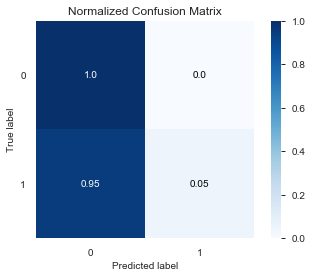

gini: 0.02212409381904068
gini_normalized: 0.05712986447676554


In [54]:
pipeline_SVC = make_pipeline(preprocessor, clf_SVC)

X_train, X_test, y_train, y_test = train_test_split(
    train,
    y, test_size=0.3)

pipeline_SVC.fit(X_train, y_train)
y_pred = pipeline_SVC.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('average_precision_score :' + str(average_precision_score(y_test,y_pred)))
print('area under the curve :' + str(roc_auc_score(y_test,y_pred)),'\n')

#we change from initi al metric AUC to ROC_auc-score
#print('area under the curve :' + str(auc(y_test,y_pred)))

#Dummy Classifier Confusion matrix

from sklearn.metrics import classification_report
print("classification_report",'\n',classification_report(y_test, y_pred))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)), '\n')

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

print("gini:",gini(y_test, y_pred))
print("gini_normalized:",gini_normalized(y_test, y_pred))

In [ ]:
preprocessor.fit(train)
train_processed = preprocessor.transform(train).toarray()
train_processed

# oversampling technique 

In [55]:
train1 = train
train1

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,18702,2014,1.000000,0,V,N,1,O,1,O,...,IDENTIQUE,V,base,2,1351.0,4,2012.000000,0.0,2,65440
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,V,N,base,2,1972.0,2,1980.000000,0.0,.,14341
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,V,N,base,2,1630.0,4,1965.061715,0.0,.,75109
3,13428,2013,0.246575,0,N,V,V,V,V,V,...,V,N,base,2,532.0,3,1965.061715,0.0,.,92004
4,17137,2015,1.000000,0,V,N,2,O,1,O,...,IDENTIQUE,V,base,2,1050.0,2,1972.000000,0.0,4,59340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,V,V,V,V,V,V,...,V,N,base,2,550.0,2,1960.000000,0.0,.,76217
10225,16868,2014,0.000000,1,V,N,2,O,1,O,...,IDENTIQUE,V,base,2,5580.0,2,2008.000000,0.0,4,78073
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,V,N,base,2,750.0,4,1965.061715,0.0,.,06029
10227,5319,2015,1.000000,0,N,V,V,V,V,V,...,V,N,base,2,1754.0,3,1960.000000,0.0,.,64445


In [56]:
train1["target"] = y
train1

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
0,18702,2014,1.000000,0,V,N,1,O,1,O,...,V,base,2,1351.0,4,2012.000000,0.0,2,65440,0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,N,base,2,1972.0,2,1980.000000,0.0,.,14341,1
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,N,base,2,1630.0,4,1965.061715,0.0,.,75109,0
3,13428,2013,0.246575,0,N,V,V,V,V,V,...,N,base,2,532.0,3,1965.061715,0.0,.,92004,0
4,17137,2015,1.000000,0,V,N,2,O,1,O,...,V,base,2,1050.0,2,1972.000000,0.0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,V,V,V,V,V,V,...,N,base,2,550.0,2,1960.000000,0.0,.,76217,0
10225,16868,2014,0.000000,1,V,N,2,O,1,O,...,V,base,2,5580.0,2,2008.000000,0.0,4,78073,0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,N,base,2,750.0,4,1965.061715,0.0,.,06029,0
10227,5319,2015,1.000000,0,N,V,V,V,V,V,...,N,base,2,1754.0,3,1960.000000,0.0,.,64445,0


Random over-sampling:
1    7907
0    7907
Name: target, dtype: int64


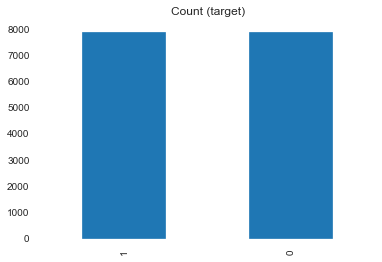

In [57]:
# Class count
count_class_0, count_class_1 = train1.target.value_counts()

# Divide by class
df_class_0 = train1[train1.target == 0]
df_class_1 = train1[train1.target == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)');

clf_RF_upgrade = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=6, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [58]:
df_class_1_over

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
5996,6424,2014,1.000000,0,N,V,V,V,V,V,...,N,base,2,4650.0,2,1980.000000,0.0,.,83069,1
8013,8838,2013,1.000000,0,V,V,V,V,V,V,...,N,base,2,697.0,4,1980.000000,0.0,.,06104,1
1159,18455,2016,1.000000,1,V,N,1,O,1,O,...,V,base,2,16347.0,2,1980.000000,0.6,7,83061,1
3640,4518,2015,1.000000,1,V,V,V,V,V,V,...,N,base,2,8018.0,3,1965.061715,0.0,.,92032,1
7826,9642,2013,1.000000,0,V,V,V,V,V,V,...,N,base,2,3000.0,2,1980.000000,0.0,.,63113,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6735,19044,2014,1.000000,0,V,N,1,O,1,O,...,V,pi,2,590.0,2,1900.000000,0.0,5,13205,1
1155,10624,2015,1.000000,0,V,V,V,V,V,V,...,N,base,2,3033.0,2,1980.000000,0.0,.,21231,1
10092,5415,2015,1.000000,0,N,V,V,V,V,V,...,N,base,2,3281.0,2,1960.000000,0.0,.,13208,1
3147,6701,2016,0.997268,0,V,N,1,O,1,O,...,V,base,2,2857.0,4,1950.000000,0.0,7,06083,1


In [59]:
y = df_test_over.target
X = df_test_over.drop("target", axis = 1)

In [60]:
from sklearn.model_selection import train_test_split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X,y, test_size=0.3)



pipeline_RF.score: 
 
 0.6990516332982086 

Accuracy Score : 0.6990516332982086
Precision Score : 0.7170154686078253
Recall Score : 0.6616288832913518
F1 Score : 0.6882096069868996
average_precision_score :0.6442611574962509
area under the curve :0.6992020844725908 

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      2363
           1       0.72      0.66      0.69      2382

    accuracy                           0.70      4745
   macro avg       0.70      0.70      0.70      4745
weighted avg       0.70      0.70      0.70      4745
 



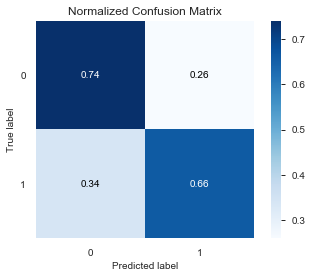

gini: 0.1012598882203106
gini_normalized: 0.40666793872651186


In [61]:
#pipeline_RF_upgrade = make_pipeline(preprocessor, clf_RF_upgrade)


pipeline_RF.fit(X_train_p, y_train_p)

y_pred_p = pipeline_RF.predict(X_test_p)

print("pipeline_RF.score:",'\n','\n',pipeline_RF.score(X_test_p, y_test_p),'\n')

print('Accuracy Score : ' + str(accuracy_score(y_test_p,y_pred_p)))
print('Precision Score : ' + str(precision_score(y_test_p,y_pred_p)))
print('Recall Score : ' + str(recall_score(y_test_p,y_pred_p)))
print('F1 Score : ' + str(f1_score(y_test_p,y_pred_p)))
print('average_precision_score :' + str(average_precision_score(y_test_p,y_pred_p)))
print('area under the curve :' + str(roc_auc_score(y_test_p,y_pred_p)), '\n')


from sklearn.metrics import classification_report
print(classification_report(y_test_p, y_pred_p),'\n')

skplt.metrics.plot_confusion_matrix(y_test_p, y_pred_p, normalize=True)
plt.show()

print("gini:", gini(y_test_p, y_pred_p))
print("gini_normalized:", gini_normalized(y_test_p, y_pred_p))

pipeline_RF.score: 
 
 0.6946259220231823 

Accuracy Score : 0.6946259220231823
Precision Score : 0.7172799254774104
Recall Score : 0.6465155331654072
F1 Score : 0.6800618238021638
average_precision_score :0.6411825607618324
area under the curve :0.6948193408526995 

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      2363
           1       0.72      0.65      0.68      2382

    accuracy                           0.69      4745
   macro avg       0.70      0.69      0.69      4745
weighted avg       0.70      0.69      0.69      4745
 



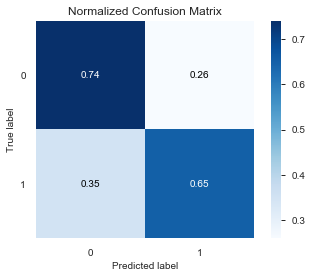

gini: 0.0991432937052481
gini_normalized: 0.3981675231751183


In [62]:
pipeline_RF_upgrade = make_pipeline(preprocessor, clf_RF_upgrade)
pipeline_RF_upgrade.fit(X_train_p, y_train_p)

y_pred_p = pipeline_RF_upgrade.predict(X_test_p)

print("pipeline_RF.score:",'\n','\n',pipeline_RF_upgrade.score(X_test_p, y_test_p),'\n')

print('Accuracy Score : ' + str(accuracy_score(y_test_p,y_pred_p)))
print('Precision Score : ' + str(precision_score(y_test_p,y_pred_p)))
print('Recall Score : ' + str(recall_score(y_test_p,y_pred_p)))
print('F1 Score : ' + str(f1_score(y_test_p,y_pred_p)))
print('average_precision_score :' + str(average_precision_score(y_test_p,y_pred_p)))
print('area under the curve :' + str(roc_auc_score(y_test_p,y_pred_p)), '\n')


from sklearn.metrics import classification_report
print(classification_report(y_test_p, y_pred_p),'\n')

skplt.metrics.plot_confusion_matrix(y_test_p, y_pred_p, normalize=True)
plt.show()

print("gini:", gini(y_test_p, y_pred_p))
print("gini_normalized:", gini_normalized(y_test_p, y_pred_p))

pipeline_GBC_over.score: 
 
 0.6558482613277133 

Accuracy Score : 0.6558482613277133
Precision Score : 0.6690744920993228
Recall Score : 0.6221662468513854
F1 Score : 0.6447683271698934
average_precision_score :0.6059489059717045
area under the curve :0.6559836735738096 

              precision    recall  f1-score   support

           0       0.64      0.69      0.67      2363
           1       0.67      0.62      0.64      2382

    accuracy                           0.66      4745
   macro avg       0.66      0.66      0.66      4745
weighted avg       0.66      0.66      0.66      4745
 



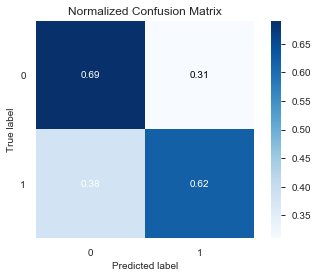

gini: 0.07974128053835448
gini_normalized: 0.3202474618319865


In [63]:
pipeline_GBC.fit(X_train_p, y_train_p)

y_pred_p = pipeline_GBC.predict(X_test_p)

print("pipeline_GBC_over.score:",'\n','\n',pipeline_GBC.score(X_test_p, y_test_p),'\n')

print('Accuracy Score : ' + str(accuracy_score(y_test_p,y_pred_p)))
print('Precision Score : ' + str(precision_score(y_test_p,y_pred_p)))
print('Recall Score : ' + str(recall_score(y_test_p,y_pred_p)))
print('F1 Score : ' + str(f1_score(y_test_p,y_pred_p)))
print('average_precision_score :' + str(average_precision_score(y_test_p,y_pred_p)))
print('area under the curve :' + str(roc_auc_score(y_test_p,y_pred_p)), '\n')


from sklearn.metrics import classification_report
print(classification_report(y_test_p, y_pred_p),'\n')

skplt.metrics.plot_confusion_matrix(y_test_p, y_pred_p, normalize=True)
plt.show()

print("gini:", gini(y_test_p, y_pred_p))
print("gini_normalized:", gini_normalized(y_test_p, y_pred_p))

pipeline_ETC.score: 
 
 0.8779768177028451 

Accuracy Score : 0.8779768177028451
Precision Score : 0.8444784103935804
Recall Score : 0.927791771620487
F1 Score : 0.8841768353670734
average_precision_score :0.8197488032983379
area under the curve :0.8777765459879837 

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2363
           1       0.84      0.93      0.88      2382

    accuracy                           0.88      4745
   macro avg       0.88      0.88      0.88      4745
weighted avg       0.88      0.88      0.88      4745
 



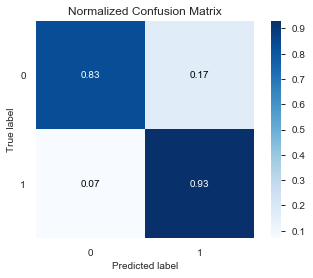

gini: 0.18857217681964925
gini_normalized: 0.7573211840958406


In [64]:
pipeline_ETC.fit(X_train_p, y_train_p)

y_pred_p = pipeline_ETC.predict(X_test_p)

print("pipeline_ETC.score:",'\n','\n',pipeline_ETC.score(X_test_p, y_test_p),'\n')

print('Accuracy Score : ' + str(accuracy_score(y_test_p,y_pred_p)))
print('Precision Score : ' + str(precision_score(y_test_p,y_pred_p)))
print('Recall Score : ' + str(recall_score(y_test_p,y_pred_p)))
print('F1 Score : ' + str(f1_score(y_test_p,y_pred_p)))
print('average_precision_score :' + str(average_precision_score(y_test_p,y_pred_p)))
print('area under the curve :' + str(roc_auc_score(y_test_p,y_pred_p)), '\n')


from sklearn.metrics import classification_report
print(classification_report(y_test_p, y_pred_p),'\n')

skplt.metrics.plot_confusion_matrix(y_test_p, y_pred_p, normalize=True)
plt.show()

print("gini:", gini(y_test_p, y_pred_p))
print("gini_normalized:", gini_normalized(y_test_p, y_pred_p))

C:\Users\vince\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


pipeline_LR.score: 
 
 0.6495258166491044 

Accuracy Score : 0.6495258166491044
Precision Score : 0.6739235607160136
Recall Score : 0.5848026868178001
F1 Score : 0.6262081366599236
average_precision_score :0.602542235254689
area under the curve :0.6497860238998014 

              precision    recall  f1-score   support

           0       0.63      0.71      0.67      2363
           1       0.67      0.58      0.63      2382

    accuracy                           0.65      4745
   macro avg       0.65      0.65      0.65      4745
weighted avg       0.65      0.65      0.65      4745
 



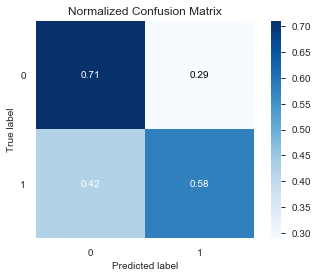

gini: 0.07639549873082183
gini_normalized: 0.3068105302393141


In [65]:
pipeline_LR.fit(X_train_p, y_train_p)

y_pred_p = pipeline_LR.predict(X_test_p)

print("pipeline_LR.score:",'\n','\n',pipeline_LR.score(X_test_p, y_test_p),'\n')

print('Accuracy Score : ' + str(accuracy_score(y_test_p,y_pred_p)))
print('Precision Score : ' + str(precision_score(y_test_p,y_pred_p)))
print('Recall Score : ' + str(recall_score(y_test_p,y_pred_p)))
print('F1 Score : ' + str(f1_score(y_test_p,y_pred_p)))
print('average_precision_score :' + str(average_precision_score(y_test_p,y_pred_p)))
print('area under the curve :' + str(roc_auc_score(y_test_p,y_pred_p)), '\n')


from sklearn.metrics import classification_report
print(classification_report(y_test_p, y_pred_p),'\n')

skplt.metrics.plot_confusion_matrix(y_test_p, y_pred_p, normalize=True)
plt.show()

print("gini:", gini(y_test_p, y_pred_p))
print("gini_normalized:", gini_normalized(y_test_p, y_pred_p))

pipeline_LR.score: 
 
 0.6581664910432033 

Accuracy Score : 0.6581664910432033
Precision Score : 0.6747930082796688
Recall Score : 0.6158690176322418
F1 Score : 0.6439859525899913
average_precision_score :0.6084186698118812
area under the curve :0.6583365401322445 

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      2363
           1       0.67      0.62      0.64      2382

    accuracy                           0.66      4745
   macro avg       0.66      0.66      0.66      4745
weighted avg       0.66      0.66      0.66      4745
 



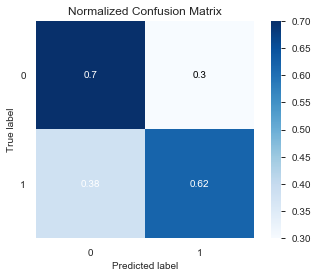

gini: 0.08125615456280375
gini_normalized: 0.326331319001696


In [66]:
pipeline_XGB.fit(X_train_p, y_train_p)

y_pred_p = pipeline_XGB.predict(X_test_p)

print("pipeline_LR.score:",'\n','\n',pipeline_XGB.score(X_test_p, y_test_p),'\n')

print('Accuracy Score : ' + str(accuracy_score(y_test_p,y_pred_p)))
print('Precision Score : ' + str(precision_score(y_test_p,y_pred_p)))
print('Recall Score : ' + str(recall_score(y_test_p,y_pred_p)))
print('F1 Score : ' + str(f1_score(y_test_p,y_pred_p)))
print('average_precision_score :' + str(average_precision_score(y_test_p,y_pred_p)))
print('area under the curve :' + str(roc_auc_score(y_test_p,y_pred_p)), '\n')


from sklearn.metrics import classification_report
print(classification_report(y_test_p, y_pred_p),'\n')

skplt.metrics.plot_confusion_matrix(y_test_p, y_pred_p, normalize=True)
plt.show()

print("gini:", gini(y_test_p, y_pred_p))
print("gini_normalized:", gini_normalized(y_test_p, y_pred_p))

# plotting roc curve:Random forest

In [67]:
clf_RF = RandomForestClassifier()
clf_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [68]:
preprocessor.fit(train)
train_processed = preprocessor.transform(train).toarray()
train_processed

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -2.06819726e-01,  1.49224801e+00,  3.69244840e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         6.81117684e-02,  4.74913524e-01,  3.69244840e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -8.32997792e-02, -7.22859626e-15,  3.69244840e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.72896744e-01, -7.22859626e-15, -2.85334434e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.84020251e-02, -1.60920527e-01,  3.69244840e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.58576904e+00,  1.56996498e-01,  3.69244840e-01]])

In [69]:
#adjusting our number of values since it has been oversampled 
y = pd.read_csv("C:/Users/vince/OneDrive/Bureau/projet/generali claim prediction/y_train_saegPGl.csv", header = 0)
y = y.drop(["Unnamed: 0"], axis = 1)
y= y['target']

In [70]:
train

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
0,18702,2014,1.000000,0,V,N,1,O,1,O,...,V,base,2,1351.0,4,2012.000000,0.0,2,65440,0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,N,base,2,1972.0,2,1980.000000,0.0,.,14341,1
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,N,base,2,1630.0,4,1965.061715,0.0,.,75109,0
3,13428,2013,0.246575,0,N,V,V,V,V,V,...,N,base,2,532.0,3,1965.061715,0.0,.,92004,0
4,17137,2015,1.000000,0,V,N,2,O,1,O,...,V,base,2,1050.0,2,1972.000000,0.0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,V,V,V,V,V,V,...,N,base,2,550.0,2,1960.000000,0.0,.,76217,0
10225,16868,2014,0.000000,1,V,N,2,O,1,O,...,V,base,2,5580.0,2,2008.000000,0.0,4,78073,0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,N,base,2,750.0,4,1965.061715,0.0,.,06029,0
10227,5319,2015,1.000000,0,N,V,V,V,V,V,...,N,base,2,1754.0,3,1960.000000,0.0,.,64445,0


In [71]:
#removing "target value to avoid data leakage
train = train.drop("target", axis = 1)

In [72]:
# encoding the varaible
preprocessor.fit(train)
train_processed = preprocessor.transform(train).toarray()
train_processed

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -2.06819726e-01,  1.49224801e+00,  3.69244840e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         6.81117684e-02,  4.74913524e-01,  3.69244840e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -8.32997792e-02, -7.22859626e-15,  3.69244840e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.72896744e-01, -7.22859626e-15, -2.85334434e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.84020251e-02, -1.60920527e-01,  3.69244840e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.58576904e+00,  1.56996498e-01,  3.69244840e-01]])

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_processed,
    y, test_size=0.3)

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier

# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC

estimators = [10, 50, 100, 200, 500] 
max_depths = [3, 6, 10, 15, 20] 

grid_values = {'n_estimators': estimators, 'max_depth':max_depths}

clf = GridSearchCV(RandomForestClassifier(), grid_values, scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=10, cv=3)
clf.fit(X_train, y_train)
best_n_estimators_value = clf.best_params_['n_estimators']
best_max_depth_value = clf.best_params_['max_depth']
best_score = clf.best_score_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  68 out of  75 | elapsed:   24.0s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   32.3s finished


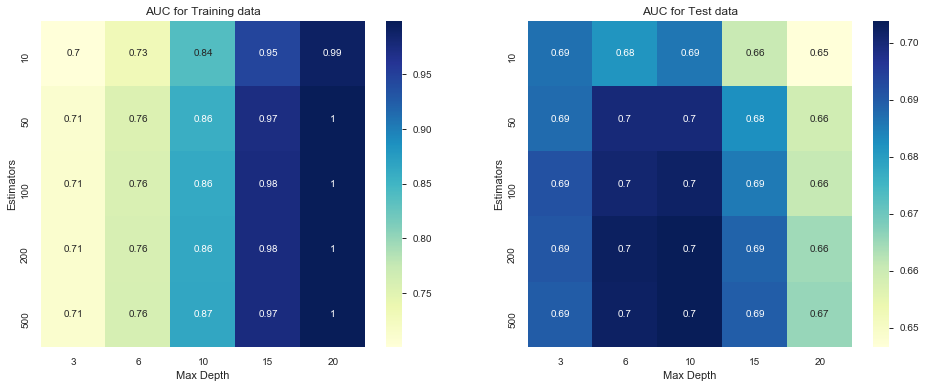

In [75]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

max_depth_list = list(clf.cv_results_['param_max_depth'].data)
estimators_list = list(clf.cv_results_['param_n_estimators'].data)

sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':clf.cv_results_['mean_train_score']})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Training data')
plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':clf.cv_results_['mean_test_score']})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Test data')
plt.show()

In [76]:
def plot_roc_curve(roc_auc_train, roc_auc_test):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr_tr, tpr_tr, 'g', label = 'Training AUC = %0.2f' % roc_auc_train)
    plt.plot(fpr_ts, tpr_ts, 'b', label = 'Testing AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def plot_conf_matrix (conf_matrix, dtype):
    class_names = [0,1]
    fontsize=14
    df_conf_matrix = pd.DataFrame(
            conf_matrix, index=class_names, columns=class_names, 
        )
    fig = plt.figure()
    heatmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for {0}'.format(dtype))

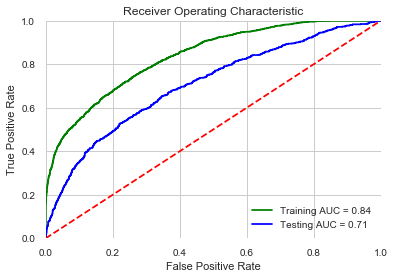

In [77]:
clf_RF_grid = RandomForestClassifier(n_estimators=best_n_estimators_value, max_depth=best_max_depth_value)
clf_RF_grid.fit(X_train, y_train)

y_pred_train = clf_RF_grid.predict_proba(X_train)[:,1]
y_pred_test = clf_RF_grid.predict_proba(X_test)[:,1]

   
#train data ROC
fpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_ts, tpr_ts)

#Plot ROC curve
plot_roc_curve(roc_auc_train, roc_auc_test)

In [78]:
acc_rf_grid = accuracy_score(y_test, clf.predict(X_test))

print("accuracy RF grid:",acc_rf_grid)

acc_rf = accuracy_score(y_test, y_pred)
print("accuracy:",acc_rf)

accuracy RF grid: 0.7849462365591398
accuracy: 0.7676767676767676


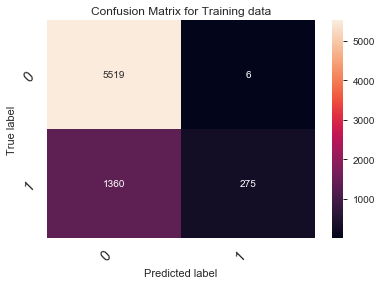

In [79]:
plot_conf_matrix(confusion_matrix(y_train, clf.predict(X_train)), "Training data")

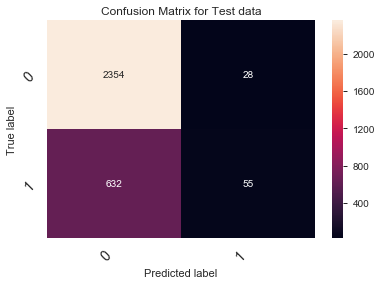

In [80]:
plot_conf_matrix(confusion_matrix(y_test, clf.predict(X_test)), "Test data")

In [81]:
# Compare both the models using Prettytable library    
x = PrettyTable()

x.field_names = ["Model", "n_estimators", "max_depth","Accuracy"]

x.add_row(["Random Forest w/o GridSearch", "default 10", "None", acc_rf])
x.add_row(["Random Forest with GridSearch", best_n_estimators_value, best_max_depth_value, acc_rf_grid])

print(x)

+-------------------------------+--------------+-----------+--------------------+
|             Model             | n_estimators | max_depth |      Accuracy      |
+-------------------------------+--------------+-----------+--------------------+
|  Random Forest w/o GridSearch |  default 10  |    None   | 0.7676767676767676 |
| Random Forest with GridSearch |     500      |     10    | 0.7849462365591398 |
+-------------------------------+--------------+-----------+--------------------+


Accuracy Score : 0.7461713913326816
Precision Score : 0.42337662337662335
Recall Score : 0.2263888888888889
F1 Score : 0.29502262443438915
average_precision_score :0.2773401061304287
area under the curve :0.5659402937420179 

classification_report 
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      2349
           1       0.42      0.23      0.30       720

    accuracy                           0.75      3069
   macro avg       0.61      0.57      0.57      3069
weighted avg       0.71      0.75      0.72      3069

Confusion Matrix : 
[[2127  222]
 [ 557  163]] 



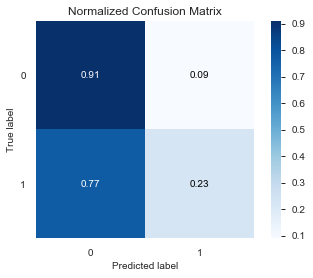

gini: 0.04403352521632092
gini_normalized: 0.11506078236601866


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train,
    y, test_size=0.3)

pipeline_RF_grid = make_pipeline(preprocessor, clf_RF)
pipeline_RF_grid.fit(X_train, y_train)
y_pred = pipeline_RF_grid.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('average_precision_score :' + str(average_precision_score(y_test,y_pred)))
print('area under the curve :' + str(roc_auc_score(y_test,y_pred)),'\n')

#we change from initi al metric AUC to ROC_auc-score
#print('area under the curve :' + str(auc(y_test,y_pred)))

#Dummy Classifier Confusion matrix

from sklearn.metrics import classification_report
print("classification_report",'\n',classification_report(y_test, y_pred))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)), '\n')

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

print("gini:",gini(y_test, y_pred))
print("gini_normalized:",gini_normalized(y_test, y_pred))

# ROC curve with gradient boosting

In [83]:
clf_XGB.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1.0,
 'gamma': 5,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 5,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1.0,
 'verbosity': 1}

In [84]:
preprocessor.fit(train)
train_processed = preprocessor.transform(train).toarray()
train_processed

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -2.06819726e-01,  1.49224801e+00,  3.69244840e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         6.81117684e-02,  4.74913524e-01,  3.69244840e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -8.32997792e-02, -7.22859626e-15,  3.69244840e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.72896744e-01, -7.22859626e-15, -2.85334434e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.84020251e-02, -1.60920527e-01,  3.69244840e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.58576904e+00,  1.56996498e-01,  3.69244840e-01]])

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_processed,
    y, test_size=0.3)

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score

# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC

estimators = [10, 50, 100, 200, 500] 
max_depths = [3, 6, 10, 15, 20] 

grid_values = {'n_estimators': estimators, 'max_depth':max_depths}

clf = GridSearchCV(XGBClassifier(), grid_values, scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=10, cv=3)
clf.fit(X_train, y_train)
best_n_estimators_value = clf.best_params_['n_estimators']
best_max_depth_value = clf.best_params_['max_depth']
best_score = clf.best_score_



Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  68 out of  75 | elapsed:  2.6min remaining:   15.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  3.8min finished


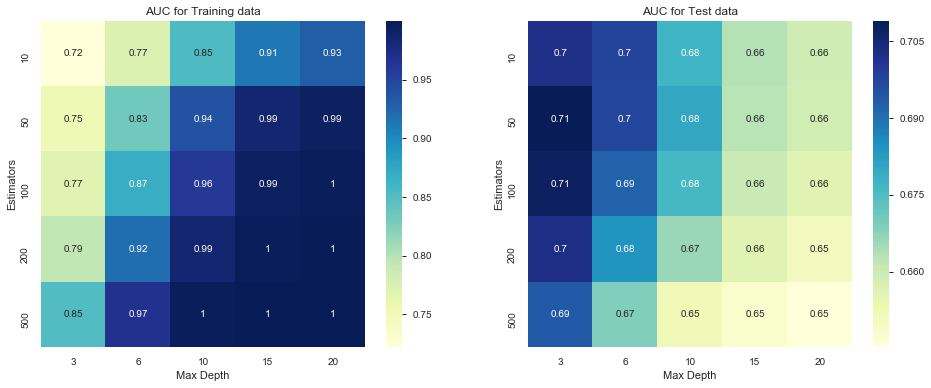

In [87]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

max_depth_list = list(clf.cv_results_['param_max_depth'].data)
estimators_list = list(clf.cv_results_['param_n_estimators'].data)

sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':clf.cv_results_['mean_train_score']})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Training data')
plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':clf.cv_results_['mean_test_score']})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Test data')
plt.show()


In [88]:
clf_XGB_grid = XGBClassifier(n_estimators=best_n_estimators_value, max_depth=best_max_depth_value)
clf_XGB_grid.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

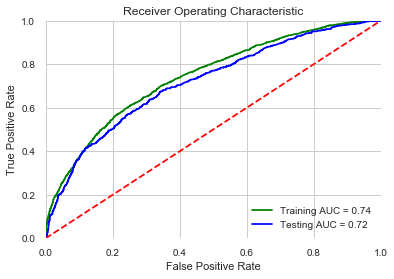

In [89]:
y_pred_train = clf_XGB_grid.predict_proba(X_train)[:,1]
y_pred_test = clf_XGB_grid.predict_proba(X_test)[:,1]

#train data ROC
fpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_ts, tpr_ts)

#Plot ROC curve
plot_roc_curve(roc_auc_train, roc_auc_test)


accuracy RF grid: 0.7934180514825676
accuracy: 0.7122841316389703
+-------------------------------+--------------+-----------+--------------------+
|             Model             | n_estimators | max_depth |      Accuracy      |
+-------------------------------+--------------+-----------+--------------------+
|  XGBClassifier w/o GridSearch |  default 10  |    None   | 0.7122841316389703 |
| XGBClassifier with GridSearch |      50      |     3     | 0.7934180514825676 |
+-------------------------------+--------------+-----------+--------------------+


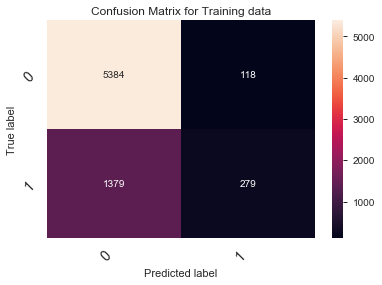

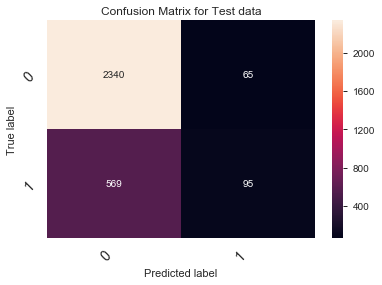

In [90]:
acc_rf_grid = accuracy_score(y_test, clf.predict(X_test))

print("accuracy RF grid:",acc_rf_grid)

acc_rf = accuracy_score(y_test, y_pred)
print("accuracy:",acc_rf)

plot_conf_matrix(confusion_matrix(y_train, clf.predict(X_train)), "Training data")

plot_conf_matrix(confusion_matrix(y_test, clf.predict(X_test)), "Test data")

# Compare both the models using Prettytable library    
x = PrettyTable()

x.field_names = ["Model", "n_estimators", "max_depth","Accuracy"]

x.add_row(["XGBClassifier w/o GridSearch", "default 10", "None", acc_rf])
x.add_row(["XGBClassifier with GridSearch", best_n_estimators_value, best_max_depth_value, acc_rf_grid])

print(x)

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score

# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC

estimators = [10, 50, 100, 200, 500] 
max_depths = [3, 6, 10, 15, 20] 

grid_values = {'n_estimators': estimators, 'max_depth':max_depths}

clf = GridSearchCV(ExtraTreesClassifier(), grid_values, scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=10, cv=3)
clf.fit(X_train, y_train)
best_n_estimators_value = clf.best_params_['n_estimators']
best_max_depth_value = clf.best_params_['max_depth']
best_score = clf.best_score_



Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1955s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.3606s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:   15.1s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  68 out of  75 | elapsed:   20.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   29.6s finished


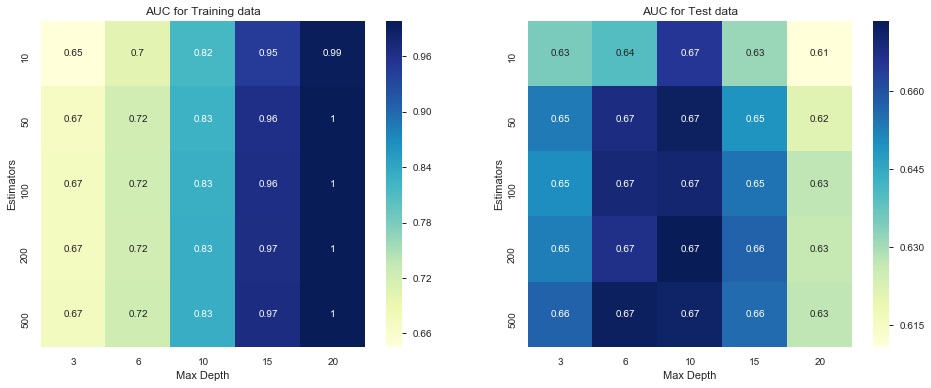

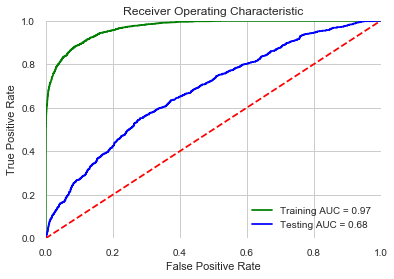

accuracy RF grid: 0.787227109807755
accuracy: 0.7122841316389703
+-------------------------------+--------------+-----------+--------------------+
|             Model             | n_estimators | max_depth |      Accuracy      |
+-------------------------------+--------------+-----------+--------------------+
|  ETClassifier w/o GridSearch  |  default 10  |    None   | 0.7122841316389703 |
| ETCClassifier with GridSearch |     200      |     10    | 0.787227109807755  |
+-------------------------------+--------------+-----------+--------------------+


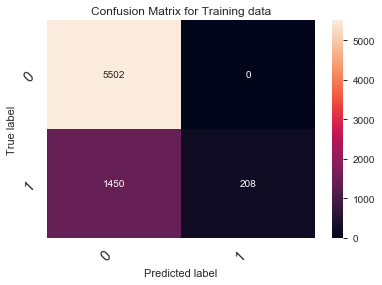

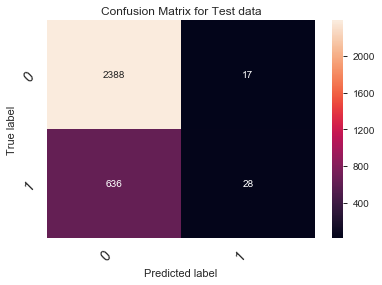

In [92]:
max_depth_list = list(clf.cv_results_['param_max_depth'].data)
estimators_list = list(clf.cv_results_['param_n_estimators'].data)

sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':clf.cv_results_['mean_train_score']})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Training data')
plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':clf.cv_results_['mean_test_score']})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Test data')
plt.show()


clf_ETC_grid = XGBClassifier(n_estimators=best_n_estimators_value, max_depth=best_max_depth_value)
clf_ETC_grid.fit(X_train, y_train)

y_pred_train = clf_ETC_grid.predict_proba(X_train)[:,1]
y_pred_test = clf_ETC_grid.predict_proba(X_test)[:,1]

#train data ROC
fpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_ts, tpr_ts)

#Plot ROC curve
plot_roc_curve(roc_auc_train, roc_auc_test)


acc_rf_grid = accuracy_score(y_test, clf.predict(X_test))

print("accuracy RF grid:",acc_rf_grid)

acc_rf = accuracy_score(y_test, y_pred)
print("accuracy:",acc_rf)

plot_conf_matrix(confusion_matrix(y_train, clf.predict(X_train)), "Training data")

plot_conf_matrix(confusion_matrix(y_test, clf.predict(X_test)), "Test data")

# Compare both the models using Prettytable library    
x = PrettyTable()

x.field_names = ["Model", "n_estimators", "max_depth","Accuracy"]

x.add_row(["ETClassifier w/o GridSearch", "default 10", "None", acc_rf])
x.add_row(["ETCClassifier with GridSearch", best_n_estimators_value, best_max_depth_value, acc_rf_grid])

print(x)

# hyperparamter tuning: randomized search

In [93]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [94]:
preprocessor.fit(train)
train_processed = preprocessor.transform(train).toarray()
train_processed

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -2.06819726e-01,  1.49224801e+00,  3.69244840e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         6.81117684e-02,  4.74913524e-01,  3.69244840e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -8.32997792e-02, -7.22859626e-15,  3.69244840e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.72896744e-01, -7.22859626e-15, -2.85334434e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.84020251e-02, -1.60920527e-01,  3.69244840e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.58576904e+00,  1.56996498e-01,  3.69244840e-01]])

In [95]:
y.shape

(10229,)

In [116]:
#https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
pprint(params)

{'colsample_bytree': [0.6, 0.8, 1.0],
 'gamma': [0.5, 1, 1.5, 2, 5],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1, 5, 10],
 'subsample': [0.6, 0.8, 1.0]}


In [117]:
from sklearn.model_selection import StratifiedKFold
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(train_processed, y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(train_processed, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  2.6min finished



 Time taken: 0 hours 3 minutes and 6.07 seconds.


In [118]:
clf_XGB1 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5,
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1.0, verbosity=1)
pipeline_XGB1 = make_pipeline(preprocessor, clf_XGB1)

In [119]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb1-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([37.28164005, 48.85731705, 43.92355704, 30.15018964, 31.65199025]), 'std_fit_time': array([0.05522964, 0.54713356, 3.31849695, 0.86994849, 2.19140168]), 'mean_score_time': array([0.04656561, 0.30684384, 0.26764758, 0.11603204, 0.09818141]), 'std_score_time': array([0.00618793, 0.01246442, 0.02042574, 0.01949356, 0.02622986]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
         

In [120]:
folds = 10
param_comb = 8

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(train_processed, y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(train_processed, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed: 12.6min finished



 Time taken: 0 hours 13 minutes and 0.89 seconds.


In [121]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([40.57039683, 63.38630219, 53.14650214, 25.52831686, 31.1789031 ,
       25.00641272, 31.68115566, 31.24887645]), 'std_fit_time': array([ 6.3941288 ,  4.47731086, 12.7268851 ,  1.74080462,  2.29030475,
        1.15755428,  3.07897694,  1.18503037]), 'mean_score_time': array([0.02782426, 0.09632115, 0.06364715, 0.02553189, 0.04158878,
       0.04248672, 0.03431766, 0.03721354]), 'std_score_time': array([0.00812326, 0.01408616, 0.02440282, 0.00296533, 0.00430226,
       0.00576739, 0.00655074, 0.00603887]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8, 1.0, 1.0, 0.8],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1, 10, 1, 1],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5

In [122]:
clf_XGB2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=2,
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.8)
pipeline_XGB2 = make_pipeline(preprocessor, clf_XGB2)

Accuracy Score : 0.7911371782339525
Precision Score : 0.5537190082644629
Recall Score : 0.20089955022488756
F1 Score : 0.2948294829482948
average_precision_score :0.2849141056415718
area under the curve :0.5779685095004538 

classification_report 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      2402
           1       0.55      0.20      0.29       667

    accuracy                           0.79      3069
   macro avg       0.68      0.58      0.59      3069
weighted avg       0.76      0.79      0.75      3069

Confusion Matrix : 
[[2294  108]
 [ 533  134]] 



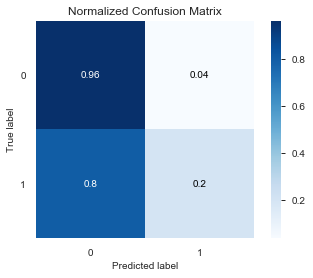

gini: 0.06507352384413852
gini_normalized: 0.1662869647607503


In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    train,
    y, test_size=0.3)

pipeline_XGB2.fit(X_train, y_train)

y_pred = pipeline_XGB2.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('average_precision_score :' + str(average_precision_score(y_test,y_pred)))
print('area under the curve :' + str(roc_auc_score(y_test,y_pred)),'\n')

#we change from initi al metric AUC to ROC_auc-score
#print('area under the curve :' + str(auc(y_test,y_pred)))

#Dummy Classifier Confusion matrix

from sklearn.metrics import classification_report
print("classification_report",'\n',classification_report(y_test, y_pred))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)), '\n')

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

print("gini:",gini(y_test, y_pred))
print("gini_normalized:",gini_normalized(y_test, y_pred))

In [ ]:
#best ginscore ever of the compettion

# Random search: Randomforest

In [124]:
#listng the parameters for the classifier we choose
clf_RF = RandomForestClassifier()
clf_RF.get_params()

#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#creating the random grid
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf_RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)



{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [125]:
rf = RandomForestClassifier(n_estimators=200, n_jobs=6, min_samples_split=2, max_features= 0.1, max_depth=10, random_state=0)
params = {
        'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
        }
pprint(params)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [126]:
preprocessor.fit(train)
train_processed = preprocessor.transform(train).toarray()
train_processed

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -2.06819726e-01,  1.49224801e+00,  3.69244840e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         6.81117684e-02,  4.74913524e-01,  3.69244840e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -8.32997792e-02, -7.22859626e-15,  3.69244840e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.72896744e-01, -7.22859626e-15, -2.85334434e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.84020251e-02, -1.60920527e-01,  3.69244840e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.58576904e+00,  1.56996498e-01,  3.69244840e-01]])

In [127]:
folds = 10
param_comb = 10

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(rf, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(train_processed, y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(train_processed, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  6.1min finished



 Time taken: 0 hours 6 minutes and 8.25 seconds.


In [128]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([15.08156059,  9.42947838,  7.63816953, 15.86975701, 24.47762761,
       17.05418355, 15.16503711,  9.73356497, 11.1547173 ,  7.4946136 ]), 'std_fit_time': array([2.01902686, 0.5954082 , 0.38286897, 1.50230225, 1.79637061,
       0.89654812, 0.78948076, 0.58411857, 0.86518791, 0.95356981]), 'mean_score_time': array([0.70012746, 0.96930757, 0.71758065, 0.98676052, 1.68010628,
       1.32525539, 1.59214113, 0.98247209, 0.78549864, 0.46834745]), 'std_score_time': array([0.18047527, 0.35745507, 0.30317724, 0.3417726 , 0.46465543,
       0.32581094, 0.3130057 , 0.33227007, 0.25175679, 0.15454109]), 'param_n_estimators': masked_array(data=[1200, 800, 800, 1400, 1800, 1600, 1400, 1000, 1000,
                   800],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[5, 5, 5, 5, 10, 5, 5, 5, 2, 2],
     

In [129]:
clf_RF2 = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=6, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
pipeline_RF2 = make_pipeline(preprocessor, clf_RF2)

Accuracy Score : 0.7790811339198436
Precision Score : 0.7096774193548387
Recall Score : 0.09205020920502092
F1 Score : 0.16296296296296298
average_precision_score :0.2774471670409044
area under the curve :0.540285308684143 

classification_report 
               precision    recall  f1-score   support

           0       0.78      0.99      0.87      2352
           1       0.71      0.09      0.16       717

    accuracy                           0.78      3069
   macro avg       0.75      0.54      0.52      3069
weighted avg       0.76      0.78      0.71      3069

Confusion Matrix : 
[[2325   27]
 [ 651   66]] 



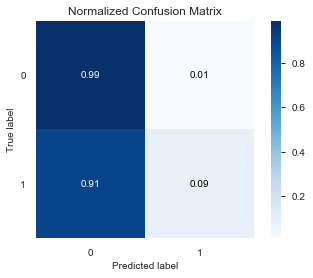

gini: 0.030760659185547806
gini_normalized: 0.08027590394595767


In [130]:
X_train, X_test, y_train, y_test = train_test_split(
    train,
    y, test_size=0.3)

pipeline_RF2.fit(X_train, y_train)

y_pred = pipeline_RF2.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('average_precision_score :' + str(average_precision_score(y_test,y_pred)))
print('area under the curve :' + str(roc_auc_score(y_test,y_pred)),'\n')

#we change from initi al metric AUC to ROC_auc-score
#print('area under the curve :' + str(auc(y_test,y_pred)))

#Dummy Classifier Confusion matrix

from sklearn.metrics import classification_report
print("classification_report",'\n',classification_report(y_test, y_pred))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)), '\n')

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

print("gini:",gini(y_test, y_pred))
print("gini_normalized:",gini_normalized(y_test, y_pred))

# Gridsearch

# Cross Validation

In [ ]:
train

In [107]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    pipeline_RF, train, y, cv=5, scoring='roc_auc')
scores
print("roc_auc", scores)
print("gini:",(scores*2)-1)

roc_auc [0.73279404 0.69678073 0.69037427 0.70519611 0.70408024]
gini: [0.46558808 0.39356146 0.38074854 0.41039222 0.40816048]


In [108]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    pipeline_RF2, train, y, cv=5, scoring='roc_auc')
scores
print("roc_auc", scores)
print("gini:",(scores*2)-1)

roc_auc [0.73315097 0.6925889  0.67688954 0.70759149 0.70930596]
gini: [0.46630193 0.38517781 0.35377908 0.41518299 0.41861191]


In [113]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    pipeline_RF3, train, y, cv=5, scoring='roc_auc')
scores
print("roc_auc", scores)
print("gini:",(scores*2)-1)

roc_auc [0.7217498  0.68146838 0.66712099 0.69981297 0.70083862]
gini: [0.44349961 0.36293676 0.33424197 0.39962593 0.40167724]


In [114]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    pipeline_GBC, train, y, cv=5, scoring='roc_auc')
scores
print("roc_auc", scores)
print("gini:",(scores*2)-1)

roc_auc [0.73520737 0.70198407 0.70553481 0.70596397 0.71327414]
gini: [0.47041474 0.40396813 0.41106962 0.41192793 0.42654829]


In [115]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    pipeline_ETC, train, y, cv=5, scoring='roc_auc')
scores
print("roc_auc", scores)
print("gini:",(scores*2)-1)

roc_auc [0.62792011 0.61084221 0.58161297 0.62783933 0.62858446]
gini: [0.25584022 0.22168441 0.16322594 0.25567866 0.25716891]


In [131]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    pipeline_LR, train, y, cv=5, scoring='roc_auc')
scores
print("roc_auc", scores)
print("gini:",(scores*2)-1)

roc_auc [0.73273342 0.70897271 0.69190862 0.70637408 0.71079249]
gini: [0.46546684 0.41794542 0.38381724 0.41274816 0.42158499]


In [132]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    pipeline_SVC, train, y, cv=5, scoring='roc_auc')
scores
print("roc_auc", scores)
print("gini:",(scores*2)-1)

roc_auc [0.69339539 0.66877915 0.65752314 0.68313168 0.68593644]
gini: [0.38679078 0.33755831 0.31504628 0.36626336 0.37187289]


In [133]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    pipeline_XGB, train, y, cv=5, scoring='roc_auc')
scores
print("roc_auc", scores)
print("gini:",(scores*2)-1)

roc_auc [0.73277701 0.70489464 0.71222379 0.70570076 0.71876704]
gini: [0.46555402 0.40978928 0.42444757 0.41140152 0.43753408]


In [134]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
pipeline_XGB_grid = make_pipeline(preprocessor, clf_XGB_grid)
scores = cross_val_score(
    pipeline_XGB_grid, train, y, cv=5, scoring='roc_auc')
scores
print("roc_auc", scores)
print("gini:",(scores*2)-1)

roc_auc [0.73283082 0.70680051 0.71184428 0.70878374 0.719801  ]
gini: [0.46566165 0.41360102 0.42368856 0.41756748 0.43960201]


In [135]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
pipeline_RF_grid = make_pipeline(preprocessor, clf_RF_grid)
scores = cross_val_score(
    pipeline_RF_grid, train, y, cv=5, scoring='roc_auc')
scores
print("roc_auc", scores)
print("gini:",(scores*2)-1)

roc_auc [0.73428577 0.69656889 0.69323145 0.7066985  0.70977966]
gini: [0.46857154 0.39313778 0.3864629  0.41339699 0.41955931]


In [136]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
pipeline_ETC_grid = make_pipeline(preprocessor, clf_ETC_grid)
scores = cross_val_score(
    pipeline_ETC_grid, train, y, cv=5, scoring='roc_auc')
scores
print("roc_auc", scores)
print("gini:",(scores*2)-1)

roc_auc [0.69787398 0.68142887 0.66676528 0.68965674 0.68863348]
gini: [0.39574796 0.36285774 0.33353057 0.37931349 0.37726695]


# hyperparameter tuning:gridsearch

In [137]:
#listng the parameters for the classifier we choose
clf_RF = RandomForestClassifier()
clf_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [138]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#creating the random grid
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [139]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf_RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [140]:
preprocessor.fit(train)
train_processed = preprocessor.transform(train).toarray()
train_processed

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -2.06819726e-01,  1.49224801e+00,  3.69244840e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         6.81117684e-02,  4.74913524e-01,  3.69244840e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -8.32997792e-02, -7.22859626e-15,  3.69244840e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.72896744e-01, -7.22859626e-15, -2.85334434e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.84020251e-02, -1.60920527e-01,  3.69244840e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.58576904e+00,  1.56996498e-01,  3.69244840e-01]])

In [141]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_processed, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [142]:
#view the best parameter
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [143]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators=200, n_jobs=6, min_samples_split=2, max_features= 0.1, max_depth=10, random_state=0)
base_model.fit(train_processed, y)
base_accuracy = evaluate(base_model, train_processed, y)
#Model Performance
#Average Error: 3.9199 degrees.
#Accuracy = 93.36%.

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, train_processed, y)
#Model Performance
#Average Error: 3.7152 degrees.
#Accuracy = 93.73%.
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
#Improvement of 0.40%.

Model Performance
Average Error: 0.1995 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 0.1868 degrees.
Accuracy = -inf%.
Improvement of nan%.


In [144]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [145]:
grid_search.fit(train_processed, y)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.8min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, train_processed, y)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

In [ ]:
#working
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    pipeline, train, y, cv=3, scoring='f1')
scores
print("f1", scores)

In [ ]:
# trial with roc auc
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    pipeline, train, y, cv=10, scoring='roc_auc')
scores
print("roc_auc", scores)

# Model cross validation and visualisation

In [ ]:
# https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough

In [ ]:
from sklearn.metrics import fbeta_score, make_scorer
scorer = make_scorer(roc_auc_score, greater_is_better=True, average = 'macro')